In [1]:
# Here we will simply import the list with all the words 
import os 
words_txt_file_path = os.path.join(os.path.expanduser("~"), "NN_zero_to_hero", "Lectures", "Makemore_repo", "names.txt")
words = open(words_txt_file_path, 'r').read().splitlines()

In [2]:
# Print the 10 first words (=names) in the list 
print(f"We have {len(words)} different names. The shortest is {min(len(w) for w in words)} characters, where as the longest is {max(len(w) for w in words)} characters.")
print(f"The 10 first names in the list are: {words[:10]}")

We have 32033 different names. The shortest is 2 characters, where as the longest is 15 characters.
The 10 first names in the list are: ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [3]:
# Here we create a dictionary that will store all our bigrams
b = {}                                      # Initiate a dictionary to store the bigrams 
for w in words:                             # Iterate over all the words ...
  chs = ['<S>'] + list(w) + ['<E>']         # Create a character list, that will be initiated with both the start and end tokens
  for ch1, ch2 in zip(chs, chs[1:]):        # Iterating over all characters in the current word ...
    bigram = (ch1, ch2)                     # Create the bigram with the pairs of characters
    b[bigram] = b.get(bigram, 0) + 1        # Get the value of the b[bigram] (or create it with value 0, if it doesn't exist) and increase by 1

In [4]:
# Print the dictionary as a sorted dictionary, sorted by the values (counts)
print(f"From the {len(words)} names we have created {len(b)} bigrams with {sum(b.values())} training examples")
sorted(b.items(), key = lambda kv: kv[1], reverse=True) 

From the 32033 names we have created 627 bigrams with 228146 training examples


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

### Create an array of counts

In [5]:
# Define a function capable of plotting our array of counts 
from typing import Union, List, Optional, Tuple, Dict 
import torch 
import matplotlib.pyplot as plt
%matplotlib inline
def plot_counts(
        N_matrix_list: Union[List[torch.tensor], torch.tensor],
        i2s: Optional[Dict[int, str]] = None,
        figsize: Tuple[int, int] = (16, 16),
        fontsize: int = 10,
        fontcolor: str = "gray",
        colormap: str = "Blues",
        draw: bool = True,
        offset: bool = False,
        print_txt: bool = True,
        title_list: Optional[List[str]] = None,
        tit_fontsize: Optional[int] = None
) -> None:
    """
    Plot a matrix showcasing bigrams using the provided N_matrix or a list of N_matrices.

    This function visualizes bigram counts stored in the N_matrix or a list of N_matrices by plotting a heatmap for each matrix.
    The function allows customizations such as adjusting the figure size, font size, font color, colormap, and displaying text on the heatmap cells.

    Parameters:
        N_matrix_list (Union[List[np.ndarray], np.ndarray]): A list of NumPy arrays or a single NumPy array containing bigram counts.
            Each matrix represents bigram counts, where rows correspond to the first character and columns correspond to the second character.
        i2s (Optional[Dict[int, str]], default=None): A dictionary mapping integer indices to character strings.
            It is used to convert integer indices to character bigrams for displaying text on the heatmap cells.
            If not provided, the function will use default integer-to-character mapping.
        figsize (Tuple[int, int], default=(16, 16)): A tuple representing the size of the figure in inches (width, height).
            It controls the overall size of the plot containing all the individual heatmaps.
        fontsize (int, default=10): The font size for the text displayed on the heatmap cells.
        fontcolor (str, default="gray"): The color of the text displayed on the heatmap cells.
        colormap (str, default="Blues"): The name of the colormap to use for the heatmaps. It should be a valid matplotlib colormap name.
        draw (bool, default=True): A flag indicating whether to draw the plot. If True, the plot will be displayed; if False, the plot will be closed.
        offset (bool, default=False): A flag indicating whether the integer-to-character mapping starts from 1 (offset=True) or 0 (offset=False).
            If offset=True, the mapping is assumed to have keys starting from 1; otherwise, it starts from 0.
        print_txt (bool, default=True): A flag indicating whether to display text on the heatmap cells.
            If True, the function will display the character bigrams and their corresponding counts on the heatmap cells.
            If False, no text will be displayed on the heatmap cells.
        title_list (Optional[List[str]], default=None): A list of strings representing the titles for each individual heatmap.
            If provided, the list should have the same length as the N_matrix_list.
            Each title represents the label for the corresponding heatmap.
        tit_fontsize (Optional[int], default=None): The font size for the heatmap titles.
            If provided, it overrides the default font size for the titles.

    Returns:
        None: This function plots the bigram heatmaps and does not return any value.

    Note:
        - The function assumes that the input N_matrix_list is either a list of NumPy arrays or a single NumPy array.
        - Each matrix in N_matrix_list represents bigram counts, where rows correspond to the first character and columns correspond to the second character.
        - The function uses matplotlib to plot the heatmaps, so make sure to have matplotlib installed to use this function.
        - If i2s is not provided, the function will use a default integer-to-character mapping, where integers are directly converted to character bigrams (e.g., 0 -> 'a', 1 -> 'b', ...).
        - If print_txt is True, the function will display the character bigrams and their corresponding counts on the heatmap cells.
        - If title_list is provided, the function will display individual heatmap titles with the specified titles for each subplot.
        - If tit_fontsize is provided, it will override the default font size for the heatmap titles.
    """

    fig = plt.figure(figsize=figsize)                                       # Create the figure instance 
    if not isinstance(N_matrix_list, list):                                 # If the provided N_matrix is not a list ...
        N_matrix_list = [N_matrix_list]                                     # ... insert it into a list 
    for idx, N_matrix in enumerate(N_matrix_list):                          # Iterating through the list of matrices 
        fig.add_subplot(1,len(N_matrix_list),idx+1)                         # Add the first subplot 
        plt.imshow(N_matrix, cmap=colormap, vmin=0, vmax=N_matrix.max() if N_matrix.max()>1 else 1) # PLot the N_matrix showcasing the bigram as a heatmap 
        # Print the count/probabilities on each of the heatmap cells 
        if print_txt:
            for i in range(N_matrix.shape[1]):
                for j in range(N_matrix.shape[0]):
                    chstr = i2s[i+1 if offset else i] + i2s[j+1 if offset else j]
                    num_to_write = f"{N_matrix[i, j].item():d}" if isinstance(N_matrix[i, j].item(), int) else f"{N_matrix[i, j].item():.2f}"
                    plt.text(j, i, chstr, ha="center", va="bottom", color=fontcolor, fontsize=fontsize)
                    plt.text(j, i, num_to_write, ha="center", va="top", color=fontcolor, fontsize=fontsize)
        plt.axis('off')
        # Add the title for the heatmap 
        if title_list is not None:
            plt.title(title_list[idx], fontsize=tit_fontsize)
    fig.tight_layout()
    if draw:
        plt.draw()
    else:
        plt.close()

In [6]:
import torch

# At first we will count how many unique characters are present in our words_list 
words_list_in_string = "".join(words)                                       # This will be a massive string of all lower case characters from all 32000 words
unique_character_list = sorted(list(set(words_list_in_string)))             # This will convert the string into a list of unique characters
num_special_tokens = 2                                                      # We start with our 2 special tokens <S> and <E> for "start" and "end" of sequence 
N_init_dim = len(unique_character_list) + num_special_tokens                # Compute the side dimension of our character count matrix 
N_init = torch.zeros((N_init_dim, N_init_dim), dtype=torch.int32)           # Initiate a 28x28 matrix of zeros, each will 
print(f"We now have the initial character bigram count matrix of size {N_init.size()}")

We now have the initial character bigram count matrix of size torch.Size([28, 28])


In [7]:
### As we just cannot insert characters into our model, we need some way of quantizing the characters
# That we will do by making a dictionary mapping from character to index
s_to_i_init = {s:i+1 for i,s in enumerate(unique_character_list)}           # Enumerate and create a dictionary mapping each character into a index parameter 
s_to_i_init["<S>"] = len(s_to_i_init)+1                                     # Assign the special start token to the dictionary 
s_to_i_init["<E>"] = len(s_to_i_init)+1                                     # Assign the special end token to the dictionary 
i_to_s_init = {i:s for s,i in s_to_i_init.items()}                          # Reverse the dictionary, so we now have a index_2_char mapping
print(f"This is the dictionary mapping from character to index:\n{s_to_i_init}")

### Now we will fill out the N_init matrix array 
for bigram, count in b.items():
    row_index = s_to_i_init[bigram[0]] -1 
    col_index = s_to_i_init[bigram[1]] -1
    N_init[row_index][col_index] = count

### Now we are going to plot our N_init array matrix 
# When drawing the N_init matrix, notice that the bottom <E> row is negative, as no bigram will every start with the end token, as well as the second last column, with <S> is all zeroes, as no bigram will end with the start token
plot_counts(N_matrix_list=N_init, i2s=i_to_s_init, figsize=(45,45), fontsize=30, fontcolor="gray", colormap="jet", draw=False, offset=True)

This is the dictionary mapping from character to index:
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '<S>': 27, '<E>': 28}


In [8]:
### We will therefore remove the special <S> and <E> tokens in favour of a single token describing both the start and end token.
# In order to get nice plottings we will simply use the '.' token 
s_to_i = {s:i+1 for i,s in enumerate(unique_character_list)}                # Enumerate and create a dictionary mapping each character into a index parameter 
s_to_i["."] = 0                                                             # Assign now only the '.' as our special token, which will denote both start and end of our sequences and put it at the BEGINNING of our dict 
i_to_s = {i:s for s,i in s_to_i.items()}                                    # Reverse the dictionary to create a mapping from indices to characters 

# Create a new N_array matrix with our counts and the '.' as the special token 
N_dim = len(s_to_i)
N = torch.zeros((N_dim, N_dim), dtype=torch.int32)
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s_to_i[ch1] 
    ix2 = s_to_i[ch2] 
    N[ix1, ix2] += 1


### Now we are plotting the new, better N matrix 
plot_counts(N_matrix_list=N, i2s=i_to_s, figsize=(45,45), fontsize=35, fontcolor="gray", colormap="jet", draw=False, offset=False)

In [9]:
# Define the generator and visualize the use of torch.multinomial()
g = torch.Generator().manual_seed(2147483647)                                           # Create a random generator with a deterministic seed 
p = torch.rand(3, generator=g)                                                          # Randomly create a vector of three samples 
p = p / p.sum()                                                                         # Normalize the vector, i.e. converting it into a probability vector 
tensor_sampled = torch.multinomial(p, num_samples=100, replacement=True, generator=g)   # Sample 'num_samples' from the range [0, len(p)] with probabilities given from p. Replacement=True allows to sample the same value more than once 

# Print sampled results 
print(f"Now we start with the probability vector: {[f'{x.item():.4f}' for x in p]}")
print(f"Hence, we expect 60% of our samples to be 0s, 30% of our samples to be 1s and 10% of our samples to be 2s")
print(f"We sample this vector using the multinomial function:\n{tensor_sampled}")
print(f"Here we have {(tensor_sampled==0).sum()} zeros, {(tensor_sampled==1).sum()} ones and {(tensor_sampled==2).sum()} twos")

Now we start with the probability vector: ['0.6064', '0.3033', '0.0903']
Hence, we expect 60% of our samples to be 0s, 30% of our samples to be 1s and 10% of our samples to be 2s
We sample this vector using the multinomial function:
tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])
Here we have 61 zeros, 33 ones and 6 twos


In [10]:
# Here we want to convert the rows of the first row of N into a vector of probabilities
g = torch.Generator().manual_seed(2147483647)
p = N[0].float() / N[0].sum()                                                   # Convert the first row of N into a probability vector
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()  # Sample 'num_samples' of the range [1, len(p)] using the probabilities from the probability vector p. 
i_to_s[ix]                                                                      # Convert the sampled index into a character string 

'j'

In [11]:
from typing import Dict, Union
g = torch.Generator().manual_seed(2147483647)


### Now we can start to sample from our "model" 
def sample_from_model(num_samples: int = 10, uniform_probs: bool = False, i2s: Dict = i_to_s, N_matrix: Union[torch.tensor, None] = N, P_matrix: Union[torch.tensor, None] = None) -> None: 
    """
    Sample words from a model output using random integer sampling and a character mapping dictionary.

    This function generates random words by sampling random integers between 0 and 26 (both inclusive) from the model's output probabilities.
    The sampled integers are then converted into character strings using a predefined mapping dictionary.

    Parameters:
        num_samples (int, optional): The number of words to sample. Defaults to 10.
        uniform_probs (bool, optional):     A flag indicating whether to use uniform probabilities for sampling.
                                                If True, each integer is equally likely to be sampled, ignoring model output probabilities.
                                                If False, the integers are sampled based on the model's output probabilities. Defaults to False.
        N_matrix (torch.tensor, optional):  The model's output probability matrix. Defaults to a predefined tensor `N`.
                                                Ensure `N` is accessible and contains the probability distribution for each integer (0 to 26).
        i2s (Dict, optional):               The character mapping dictionary. Defaults to a predefined dictionary `i_to_s`.
                                                Ensure `i_to_s` is accessible and maps integers to character strings.

    Returns:
        None: This function prints the sampled words and does not return any value.

    Note:
        - The function assumes the existence of a predefined mapping dictionary `i_to_s`, which maps integers to character strings.
        - The variable `N` must be accessible, and it represents the model's output probabilities. It is assumed to be a PyTorch tensor.
        - The variable `g` must be accessible and represent a PyTorch random generator for reproducible results.
        - The function uses the provided `N_matrix` and `i2s` parameters to override default values if specified.
        - Make sure to provide appropriate values for `N_matrix` and `i2s` if overriding the default ones.
        - The function uses a `while True` loop to sample integers until it encounters the integer 0. This ensures that the function generates words of varying lengths, as the sampling process stops when 0 is sampled.
        - If `uniform_probs` is set to True, the function uses uniform probabilities for sampling, meaning that each integer is equally likely to be sampled, regardless of its probability in the model's output.
        - If `uniform_probs` is set to False (default), the function samples integers based on the model's output probabilities.
    """
    for i in range(num_samples):
        out = list()                                            
        ix = 0
        while True:
            if N_matrix is not None:
                p = N_matrix[ix].float() / N_matrix[ix].sum()           # This is very inefficient, as we compute probabilities and divide every time we sample a new integer 
            if P_matrix is not None:
                p = P_matrix[ix]                                        # This is way more efficient as we use the already computed probabilities 
            if uniform_probs:
                p = torch.ones(N_matrix.shape[0]) / N_matrix.shape[0]
            ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
            if ix==0:
                break 
            out.append(i2s[ix])
        print("".join(out))

# Now we can sample from the model using the probabilities provided 
sample_from_model(num_samples=5, N_matrix=N, uniform_probs=False); print()
sample_from_model(num_samples=5, N_matrix=N, uniform_probs=True)

junide
janasah
p
cony
a

nzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz
rjpiufmthdt
rkrrsru
iyumuyfy


In [12]:
######################################################### EFFICIENCY UPDATE OF THE SAMPLING FUNCTION #########################################################
# Section from the lecture -> https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=2&t=2177s 

"""
Instead of sampling into the N matrix at each step and then re-compute the probabilities, we want to compute all the probabilities at once, before entering the function 
In order to stabilize our probability vectors and avoid impossible (=zero probability) sampling, we add a small factor of 1 to the counts matrix 

Here we have to be careful with the summation, due to later broadcasting semantics -> https://pytorch.org/docs/stable/notes/broadcasting.html 
The documentation states -> torch.sum(input, dim, keepdim=False) ->  https://pytorch.org/docs/stable/generated/torch.sum.html#torch.sum 
The input is our tensor N+1.
The dimension is along the first dimension (i.e. left to right) as we want the sum of each row in order to normalize the probabilities
The keepdim has to be True in order to keep the dimension of the output Tensor. If we input a 27x27 and sum along the first dimension, we simply get a 1D vector of shape 27. However, with keepdim=True we get 27x1 
"""

P = (N+1).float()


# The entries for P.sum(dim=1, keepdim=False) and P.sum(dim=1, keepdim=True) are equal, it is only the shape of the output that is different 
print(f"Just using P.sum() would yield a tensor with size: {P.sum().size()} and value: {P.sum()}")
print(f"Using P.sum(dim=1, keepdim=False) would yield a tensor with size: {P.sum(dim=1,keepdim=False).size()}")
print(f"Using P.sum(dim=1, keepdim=True) would yield a tensor with size: {P.sum(dim=1,keepdim=True).size()}")

"""
Now, in order to normalize the P matrix along the rows (i.e. let the sum of each row be 1), we have to divide each element in each row by the sum of that corresponding row
This we can do in Python using what is called broadcasting.
From the broadcast semantics we can see that two tensors are broadcastable if:
    - Each tensor has at least one dimension
    - When iterating over the dimension sizes of the two tensors, starting at the trailing dimension, the dimension sizes must either:
            * be equal
            * one of them is 1 
            * one of them does not exist
This means that for our example, where we have
P_orig = 27 x 27
P_sum  = 27 x  1
We are fulfilling the criteria, i.e. the P / P_sum is broadcastable
However, math wise we cannot divide a 27x27 with a 27x1.
Hence, in order to be able to broadcast Python will internally copy all the columns along the dimension which is 1 and then perform an elementwise division:
i.e. what happens is:
P_orig: 27 x 27                                                           P_orig stays: 27 x 27
                copy each column along the first dimension which is 1 ->                         elementwise division -> output is 27 x 27 
P_sum:  27 x  1                                                           P_sum is now: 27 x 27


If we had set keepdim==False, then the output would have been only "not exist" x 27, and then copied into 27x27, and then that  
would have resulted in a copy upside down (along rows) instead of the copy along columns, i.e. a normalization in the wrong direction
i.e. that would have been:
P_orig:  27 x 27   ->   27 x 27   ->   27 x 27 
P_sum:        27   ->   1  x 27   ->   27 x 27
This is because the rules of broadcasting are as follows:
1) Align dimensions on the right
2) If a dimension does not exist, then create it by unsqueezing 
3) If any dimension is only 1 on one of the two tensors, copy the smallest tensor in the direction of that dimension in order to make the tensors have the same shapes 
"""
P = (N+1).float()
P_sum_keepdim = P.sum(dim=1, keepdim=True)
P_sum_notkeepdim = P.sum(dim=1, keepdim=False)
print(f"\nThis is the shape of the P_sum_notkeepdim: {P_sum_notkeepdim.size()} with values in a 1D column vector:\n{P_sum_notkeepdim}")
print(f"\nThis is the shape of the P_sum_keepdim: {P_sum_keepdim.size()} with values in a 2D row vector:\n{P_sum_keepdim}")

Just using P.sum() would yield a tensor with size: torch.Size([]) and value: 228875.0
Using P.sum(dim=1, keepdim=False) would yield a tensor with size: torch.Size([27])
Using P.sum(dim=1, keepdim=True) would yield a tensor with size: torch.Size([27, 1])

This is the shape of the P_sum_notkeepdim: torch.Size([27]) with values in a 1D column vector:
tensor([32060., 33912.,  2672.,  3559.,  5523., 20450.,   932.,  1954.,  7643.,
        17728.,  2927.,  5067., 13985.,  6669., 18354.,  7961.,  1053.,   299.,
        12727.,  8133.,  5597.,  3162.,  2600.,   956.,   724.,  9803.,  2425.])

This is the shape of the P_sum_keepdim: torch.Size([27, 1]) with values in a 2D row vector:
tensor([[32060.],
        [33912.],
        [ 2672.],
        [ 3559.],
        [ 5523.],
        [20450.],
        [  932.],
        [ 1954.],
        [ 7643.],
        [17728.],
        [ 2927.],
        [ 5067.],
        [13985.],
        [ 6669.],
        [18354.],
        [ 7961.],
        [ 1053.],
        [ 

In [13]:
# Compute the two probability matrices 
P_keep = P / P_sum_keepdim          
P_not_keep = P/P_sum_notkeepdim
P = P_keep

# Actually, the preferred would have been
P = (N+1).float()
P /= P.sum(dim=1, keepdim=True) 
# as in_place operations (like /=) are more efficient, as they don't create 
# new memory "under the hood", they simply replace the variable already created

In [14]:
# Now we can plot the two figures where the normalization has happened either from left to right (as wanted) or upside down 
plot_counts(N_matrix_list=[P_keep, P_not_keep], i2s=i_to_s, figsize=(60,120), fontsize=30, colormap="jet", draw=False, title_list=["Correct broadcast & bigram probabilities", "Wrong broadcast & bigram probabilities"], tit_fontsize=95)

In [15]:
g = torch.Generator().manual_seed(2147483647)

# Now we re-sample from the model again using the probability P-matrix
# This almost requires a re-write of the sample_from_model function from before 

def sample_from_model_new(num_samples: int = 5, P_matrix: torch.tensor = P, uniform_probs: bool = False):
  for _ in range(num_samples):
    out = []
    ix = 0
    while True:
      if not uniform_probs:
        p = P_matrix[ix]
      else:
        p = torch.ones(P_matrix.shape[0]) / P_matrix.shape[0]
      ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
      out.append(i_to_s[ix])
      if ix == 0:
        break
    print(''.join(out))
 

# We can see here that we are sampling the exact same five new words as before, but now we are using the probability matrix 
# Hence, we 
sample_from_model_new(num_samples=5, P_matrix=P, uniform_probs=False); print()
sample_from_model_new(num_samples=5, P_matrix=P, uniform_probs=True)

junide.
janasah.
p.
cony.
a.

nzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.


In [16]:
### Now we have a model from which we are capable of sampling (i.e. predicting new words)
# From this sampling we can see that even though sampling with bigram probabilities doesn't provide real, new words/names, 
# it is still way better than sampling with the uniform probabilities.
# Hence, this means, that we can conclude, that our model has learned something from the bigram probabilities
# For example, we can see that the bigram (m, a) has a probability of around 39%. 
# That means that the model knows that in 39% of the times we have an 'm', then it will be successed by an 'a'.
# Hence, in 39% of the situations, where the model has sampled an 'm', an 'a' will be sampled afterwards 

### Here we can visualize the bigrams from the first three words in our list of words, including the probabilities for each of these bigrams

log_likelihood, n_count = 0, 0
for w in words[:3]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s_to_i[ch1]
    ix2 = s_to_i[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n_count += 1
    print(f"The bigram: ({ch1}, {ch2}) has a p={prob:.4f}, which gives a log(p)={logprob:.4f}")
mean_nll_loss_bigram_model = -log_likelihood/n_count
print(f"This means that the log likelihood for all these bigrams are {log_likelihood:.4f}")
print(f"This gives a negative log likelihood (nll) loss of {mean_nll_loss_bigram_model:.4f}")

The bigram: (., e) has a p=0.0478, which gives a log(p)=-3.0410
The bigram: (e, m) has a p=0.0377, which gives a log(p)=-3.2793
The bigram: (m, m) has a p=0.0253, which gives a log(p)=-3.6753
The bigram: (m, a) has a p=0.3885, which gives a log(p)=-0.9454
The bigram: (a, .) has a p=0.1958, which gives a log(p)=-1.6305
The bigram: (., o) has a p=0.0123, which gives a log(p)=-4.3965
The bigram: (o, l) has a p=0.0779, which gives a log(p)=-2.5526
The bigram: (l, i) has a p=0.1774, which gives a log(p)=-1.7293
The bigram: (i, v) has a p=0.0152, which gives a log(p)=-4.1845
The bigram: (v, i) has a p=0.3508, which gives a log(p)=-1.0476
The bigram: (i, a) has a p=0.1380, which gives a log(p)=-1.9807
The bigram: (a, .) has a p=0.1958, which gives a log(p)=-1.6305
The bigram: (., a) has a p=0.1376, which gives a log(p)=-1.9835
The bigram: (a, v) has a p=0.0246, which gives a log(p)=-3.7041
The bigram: (v, a) has a p=0.2473, which gives a log(p)=-1.3971
The bigram: (a, .) has a p=0.1958, which

In [17]:
# Now we will simply compute the NLL loss for the entire dataset
# by running through the probabilities of all the bigrams in the dataset
log_likelihood, n_count = 0, 0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    prob = P[s_to_i[ch1],s_to_i[ch2]]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n_count += 1
mean_nll_loss_bigram_model = -log_likelihood/n_count
print(f"For the {n_count} bigrams we compute a NLL loss of {mean_nll_loss_bigram_model:.4f}")
print(f"This loss will then be considered our lower bound for such a bigram model")

For the 228146 bigrams we compute a NLL loss of 2.4544
This loss will then be considered our lower bound for such a bigram model


In [18]:
### As we can see the lower bound of this bigram model is 2.45 we can compute what probability leads to that result 
# We have 2.45 = -log(x)  ->  exp(-2.45) = x  ->  x ≈ 0.086 
print(f"The average selected probability for all {n_count} bigrams is {torch.exp(-mean_nll_loss_bigram_model):.5f}")

The average selected probability for all 228146 bigrams is 0.08592


We are using the natural logarithm for this log likelihood:

torch.log(torch.tensor(math.exp(1)))    = 1.0
torch.log10(torch.tensor(math.exp(1)))  = 0.4343
torch.log(torch.tensor(10))             = 2.3026
torch.log10(torch.tensor(10))           = 1.0000


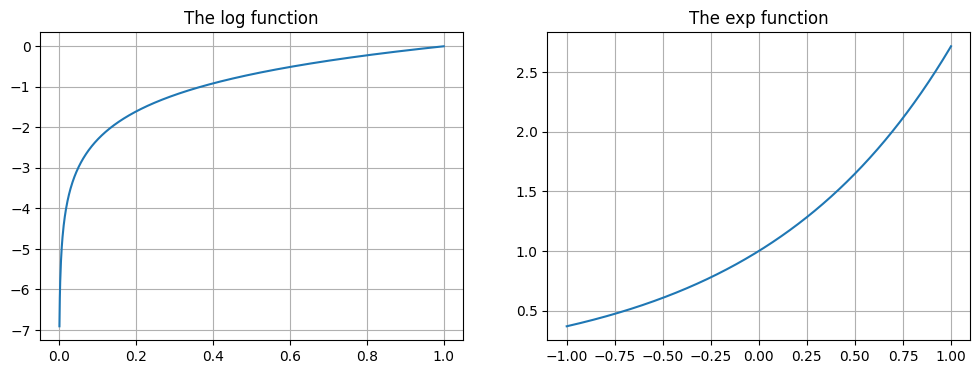

In [19]:
# Note that we are using the natural logarithm with this log likelihood function.
import math 
print(f"We are using the natural logarithm for this log likelihood:\n")
print(f"torch.log(torch.tensor(math.exp(1)))".ljust(40) + f"= {torch.log(torch.tensor(math.exp(1)))}")
print(f"torch.log10(torch.tensor(math.exp(1)))".ljust(40) + f"= {torch.log10(torch.tensor(math.exp(1))):.4f}")
print(f"torch.log(torch.tensor(10))".ljust(40) + f"= {torch.log(torch.tensor(10)):.4f}")
print(f"torch.log10(torch.tensor(10))".ljust(40) + f"= {torch.log10(torch.tensor(10)):.4f}")

# Draw the logarithm and exponential functions 
x1 = torch.linspace(0.001, 1, 1000)
x2 = torch.linspace(-1, 1, 1000)
fig=plt.figure(figsize=(12,4)); plt.subplot(1,2,1); plt.title("The log function"); plt.plot(x1, torch.log(x1)); plt.grid(True); plt.subplot(1,2,2); plt.title("The exp function"); plt.plot(x2, torch.exp(x2)); plt.grid(True); plt.draw()

In [20]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [21]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w_count, w in enumerate(words[:1]):
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s_to_i[ch1]
    ix2 = s_to_i[ch2]
    print(f"Now we have the bigram ({ch1}, {ch2})")
    xs.append(ix1)
    ys.append(ix2)

# Convert the bigrams into tensors 
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(f"From this {w_count+1} word{'s' if w_count else ''} we have {xs.shape[0]} bigrams")
print(f"These {xs.shape[0]} bigrams are: \n{xs}\n{ys}")

Now we have the bigram (., e)
Now we have the bigram (e, m)
Now we have the bigram (m, m)
Now we have the bigram (m, a)
Now we have the bigram (a, .)
From this 1 word we have 5 bigrams
These 5 bigrams are: 
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


Now we have the xenc of shape torch.Size([5, 27]) and data type torch.float32:


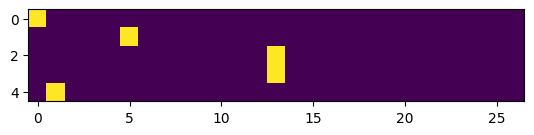

In [22]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()    # Note that we cast this encoding to a float 
print(f"Now we have the xenc of shape {xenc.size()} and data type {xenc.dtype}:")
plt.imshow(xenc); plt.draw(); 

In [23]:
W = torch.randn((27, 27))                   # The hidden layer
logits = xenc @ W                           # Our computed log-counts 
# This below is equal to the softmax function
counts = logits.exp()                       # Equivalent to N
probs = counts / counts.sum(1,keepdim=True) # Probabilities

# The first output row is the result from the first input bigram example 
print(f"This is the first row of logits that sum to {logits[0].sum():.4f}:\n{logits[0]}")
print(f"This is the first row of counts that sum to {counts[0].sum():.4f}:\n{counts[0]}")
print(f"This is the first row of probs  that sum to {probs[0].sum():.4f}:\n{probs[0]}")

This is the first row of logits that sum to 7.2981:
tensor([ 0.6864,  1.3338, -0.1414, -0.7356,  0.3093,  0.8409,  2.6342,  0.5260,
         0.5368,  0.8954,  1.0906, -0.9103, -0.1501, -1.0778,  1.3961, -0.1602,
         0.7263, -0.6999, -0.2933, -1.2533, -1.4244,  1.4685, -0.1302,  1.0654,
         0.1282,  0.6283,  0.0084])
This is the first row of counts that sum to 56.0421:
tensor([ 1.9866,  3.7954,  0.8682,  0.4792,  1.3624,  2.3184, 13.9316,  1.6921,
         1.7106,  2.4483,  2.9761,  0.4024,  0.8606,  0.3403,  4.0395,  0.8520,
         2.0675,  0.4966,  0.7458,  0.2856,  0.2407,  4.3428,  0.8779,  2.9020,
         1.1368,  1.8745,  1.0084])
This is the first row of probs  that sum to 1.0000:
tensor([0.0354, 0.0677, 0.0155, 0.0086, 0.0243, 0.0414, 0.2486, 0.0302, 0.0305,
        0.0437, 0.0531, 0.0072, 0.0154, 0.0061, 0.0721, 0.0152, 0.0369, 0.0089,
        0.0133, 0.0051, 0.0043, 0.0775, 0.0157, 0.0518, 0.0203, 0.0334, 0.0180])


In [24]:
########################
### Here we run a forward pass for one example at a time - a very inefficient way 
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {i_to_s[x]}{i_to_s[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0354, 0.0677, 0.0155, 0.0086, 0.0243, 0.0414, 0.2486, 0.0302, 0.0305,
        0.0437, 0.0531, 0.0072, 0.0154, 0.0061, 0.0721, 0.0152, 0.0369, 0.0089,
        0.0133, 0.0051, 0.0043, 0.0775, 0.0157, 0.0518, 0.0203, 0.0334, 0.0180])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.04136824607849121
log likelihood: -3.18524169921875
negative log likelihood: 3.18524169921875
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0474, 0.0492, 0.0160, 0.0363, 0.2042, 0.0464, 0.0055, 0.0077, 0.0069,
        0.0531, 0.0336, 0.0742, 0.0059, 0.0590, 0.0174, 0.0433, 0.0308, 0.0124,
        0.0125, 0.0492, 0.0338, 0.0193, 0.0104, 0.0327, 0.0154, 0.0221, 0.0549])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.05

In [25]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)  # Remember to set the requires_grad=True 

# Forward pass
xenc = F.one_hot(xs, num_classes=27).float()                # input to the network: one-hot encoding
logits = xenc @ W                                           # predict log-counts
counts = logits.exp()                                       # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)               # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()             # Compute the loss in a vectorized manner 
print(f"Now the forward pass in vectorized form gives the loss {loss.item():.4f}.\nBefore in the 'one sample at a time' for loop we had a loss of {nlls.mean().item():.4f}")

Now the forward pass in vectorized form gives the loss 3.7693.
Before in the 'one sample at a time' for loop we had a loss of 3.4218


In [26]:
# Backward pass
W.grad = None               # set to zero the gradient
loss.backward()             # Compute the gradients for all parameters 
W.data += -0.1 * W.grad     # Update the parameters of the model 

### Training more efficient

In [27]:
# create the dataset with all the words in the list 
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s_to_i[ch1]
    ix2 = s_to_i[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'number of examples: {num}')

# initialize the 'network' (i.e. the single, hidden linear layer) 
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(s_to_i), len(s_to_i)), generator=g, requires_grad=True)

number of examples: 228146


In [28]:
### Gradient descent approach to minimize the NLL loss 
# As we are still only using a bigram model with only a single layer, we will expect the loss to go down to a minima of 
num_iterations = 250
for k in range(num_iterations):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=len(s_to_i)).float()                   # input to the network: one-hot encoding
  logits = xenc @ W                                                       # predict log-counts
  counts = logits.exp()                                                   # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True)                           # probabilities for next character (softmax)
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()  # NLL loss + regularization (weight decay) loss 
  if (k+1) % 25 == 0 or k==0:
    print(f"At the {k+1}. iteration we gain a loss of {loss.item()}")
  
  # Backward pass
  W.grad = None             # Set to zero the gradient, W.grad=None should be more efficient than W.grad = 0
  loss.backward()           # Compute gradients for all the parameters of the model 
  
  # Update the parameters of the model
  W.data += -(1 - k/num_iterations) * 50 * W.grad    # In this simple example we can affort a super high learning rate of 50 

At the 1. iteration we gain a loss of 3.7686190605163574
At the 25. iteration we gain a loss of 2.5668609142303467
At the 50. iteration we gain a loss of 2.5157084465026855
At the 75. iteration we gain a loss of 2.5010147094726562
At the 100. iteration we gain a loss of 2.4945943355560303
At the 125. iteration we gain a loss of 2.491189479827881
At the 150. iteration we gain a loss of 2.489206552505493
At the 175. iteration we gain a loss of 2.488002061843872
At the 200. iteration we gain a loss of 2.4872772693634033
At the 225. iteration we gain a loss of 2.4868834018707275
At the 250. iteration we gain a loss of 2.4867498874664307


In [29]:
# Because of the way the dot product works with onehot encoded vectors we can see that multiplying a 
# onehot encoded vector is just similar to indexing into a matrix with the row at the corresponding index 
index_num = 4
dot_product_computation = W @ F.one_hot(torch.tensor(index_num), num_classes=len(s_to_i)).float()
index_row = W[:,4]
print(f"The dot_product_computation and indexed row are {'NOT' if not torch.equal(dot_product_computation, index_row) else ''}equal")

The dot_product_computation and indexed row are equal


In [30]:
### Compute the probabilities from the linear layer of our trained neural network
# Notice that P and P_NN are almost identical 
P_NN = W.exp() / W.exp().sum(dim=1,keepdim=True)
P_NN_mean = P_NN.mean()
P_mean = P.mean()
P_NN_and_P_diff = ((P-P_NN)**2).mean()
print(f"The bigram counts probability matrix P has a mean value of {P_mean:.5f}")
print(f"The Neural Network probability matrix P_NN has a mean value of {P_NN_mean:.5f}")
print(f"The MSE between the two matrices is as small as {P_NN_and_P_diff:.6f}")

The bigram counts probability matrix P has a mean value of 0.03704
The Neural Network probability matrix P_NN has a mean value of 0.03704
The MSE between the two matrices is as small as 0.000152


In [31]:
# Plot the probabilities
plot_counts(N_matrix_list=[P, P_NN.detach()], i2s=i_to_s, figsize=(60,120), fontsize=30, colormap="jet", draw=False, title_list=["Bigram counted probabilities", "Neural Network probabilities"], tit_fontsize=95)

In [32]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    # p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(i_to_s[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.
